---
# Libreria Matplotlib
- Funciones pyplot
- Modelo de Orientación a Objetos
- Apariencia
- Tipos de gráficos
- Estilos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de datos de Contagios por día

In [3]:
df = pd.read_csv('datos-covid-etareo.csv')
df.head()

,Grupo de edad,Sexo,Fecha,Contagios
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25


In [3]:
print(df['Fecha'].min(), df['Fecha'].max())

2020-03-25 2020-11-13


In [11]:
df2 = df.groupby('Fecha').sum().reset_index(drop=True)

In [6]:
df2.head()

,Grupo de edad,Sexo,Contagios
0,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF,1012
1,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF,1252
2,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF,1434
3,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF,1723
4,00 - 04 años05 - 09 años10 - 14 años15 - 19 añ...,MMMMMMMMMMMMMMMMMFFFFFFFFFFFFFFFFF,1906


### Gráfico utilizando las funciones pyplot

Text(0, 0.5, 'Cantidad de Contagios')

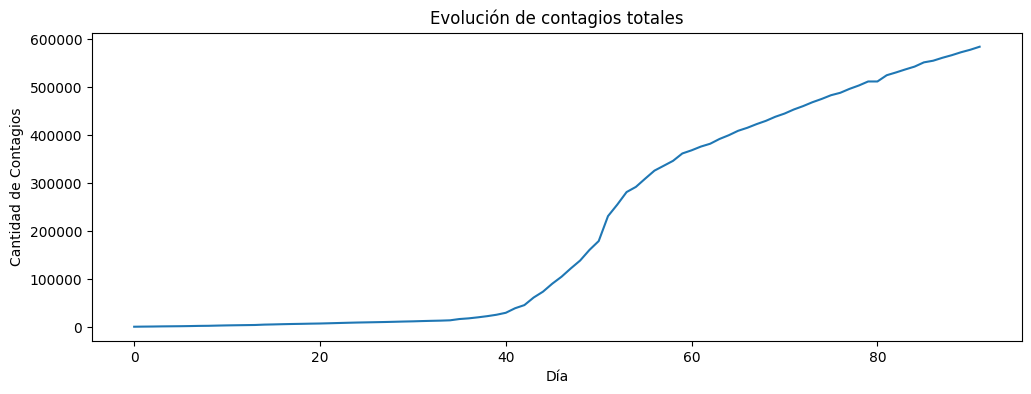

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df2.index, df2['Contagios'])
plt.title('Evolución de contagios totales')
plt.xlabel('Día')
plt.ylabel('Cantidad de Contagios')

### Subgráficos

In [13]:
df_m = df[df['Sexo']=='M'].groupby('Fecha').sum().reset_index(drop=True)

In [14]:
df_f = df[df['Sexo']=='F'].groupby('Fecha').sum().reset_index(drop=True)

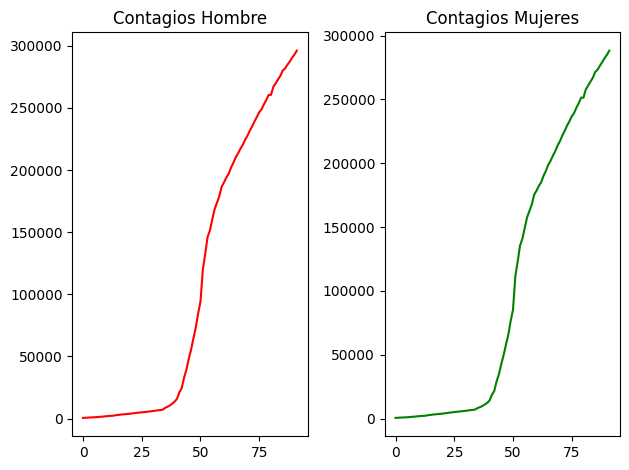

In [15]:
plt.subplot(1,2,1)
plt.plot(df_m.index, df_m['Contagios'], 'r')
plt.title('Contagios Hombre')

plt.subplot(1,2,2)
plt.plot(df_f.index, df_f['Contagios'], 'g')
plt.title('Contagios Mujeres')

plt.tight_layout()

### Utilizando la orientación a objetos en la libreria Matplotlib

Text(0.5, 1.0, 'Total de Contagiados')

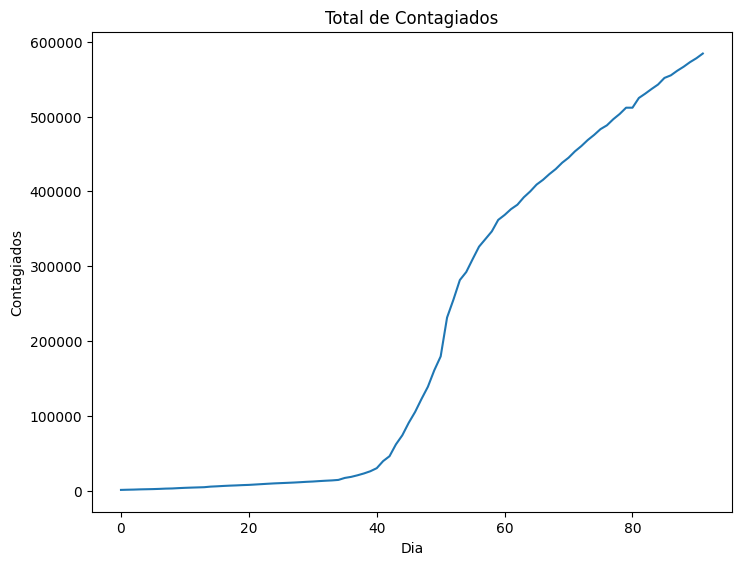

In [16]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df2.index, df2['Contagios'])
axe.set_xlabel('Dia')
axe.set_ylabel('Contagiados')
axe.set_title('Total de Contagiados')

### Posicionando varios ejes en una misma figura

Text(0.5, 1.0, 'Mujeres')

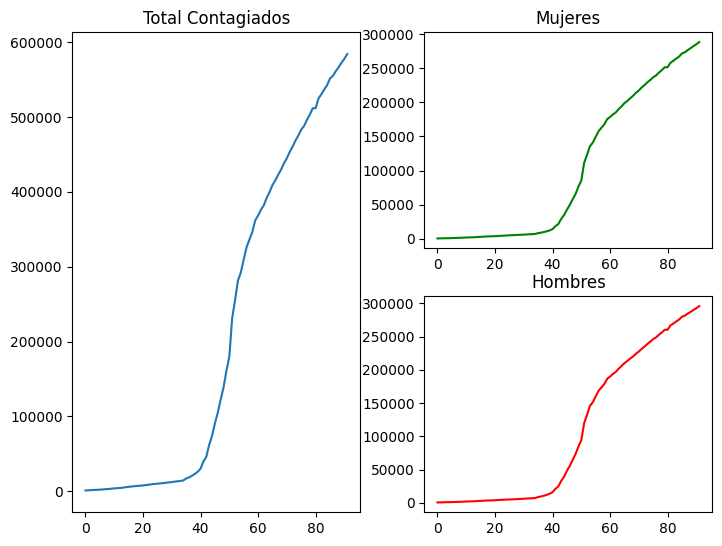

: 

In [ ]:
fig = plt.figure()
axe1 = fig.add_axes( [0, 0, 0.45, 1] )
axe2 = fig.add_axes( [0.55, 0, 0.45, 0.45] )
axe3 = fig.add_axes( [0.55, 0.55, 0.45, 0.45] )

axe1.plot(df2.index, df2['Contagios'])
axe2.plot(df_m.index, df_m['Contagios'], 'r')
axe3.plot(df_f.index, df_f['Contagios'], 'g')

axe1.set_title('Total Contagiados')
axe2.set_title('Hombres')
axe3.set_title('Mujeres')

### Grilla de gráficos con orientación a objetos

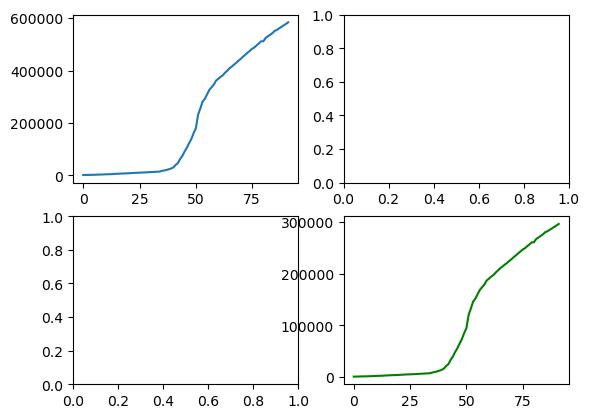

In [12]:
fig, axes = plt.subplots( nrows=2, ncols=2 )
axes[0][0].plot(df2)
axes[1][1].plot(df_m,'g')

### Graficar más de una serie en un juego de ejes

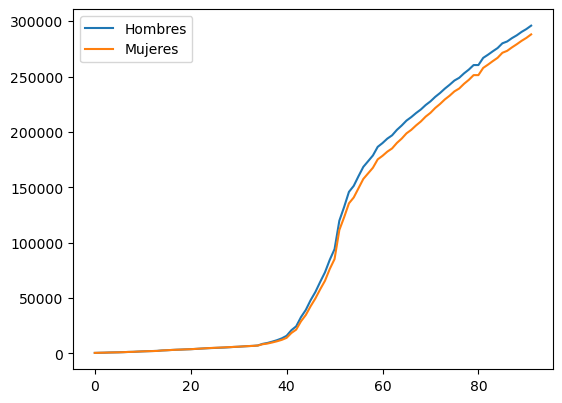

In [13]:
fig = plt.figure()
axe = fig.add_axes([0.2, 0.2, 0.75, 0.75])
axe.plot(df_m, label='Hombres')
axe.plot(df_f, label='Mujeres')
axe.legend(loc=0)

### Guardar un grafico como imagen

In [14]:
fig.savefig('mi-grafico.png', dpi=200)

### Personalizando la apariencia

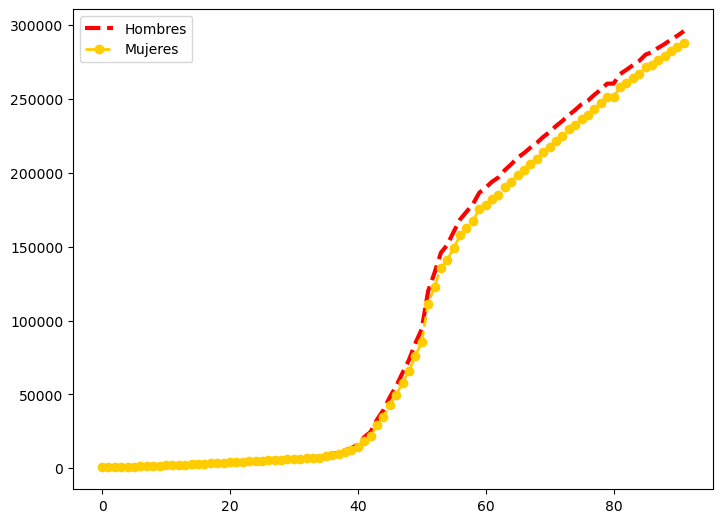

In [15]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df_m, label='Hombres', color='red', linestyle='dashed', linewidth=3)
axe.plot(df_f, label='Mujeres', c='#FFCC00', ls='--', lw=2, marker='o')
axe.legend(loc=0)

### Límites del gráfico

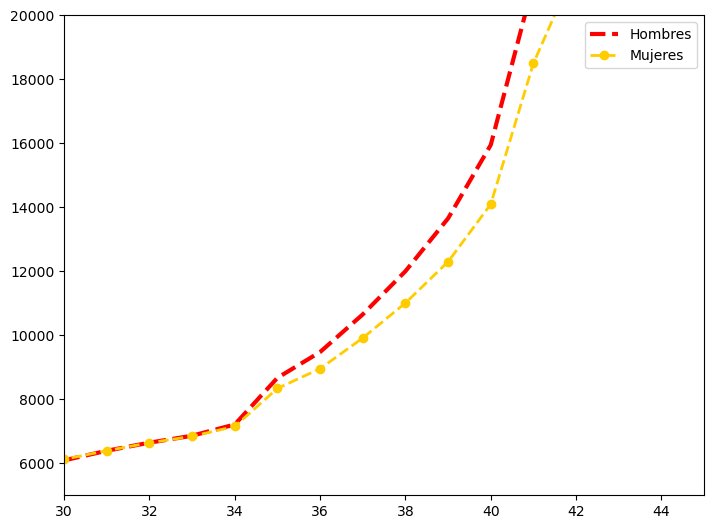

In [16]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot(df_m, label='Hombres', color='red', linestyle='dashed', linewidth=3)
axe.plot(df_f, label='Mujeres', c='#FFCC00', ls='--', lw=2, marker='o')
axe.set_xlim( [30,45] )
axe.set_ylim( [5000,20000] )
axe.legend(loc=0)

## Tipos de Gráfico

In [19]:
dfs = pd.read_csv('Salaries.csv')
dfs.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


### A. Histograma

C:\Users\jorge\AppData\Local\Temp\ipykernel_35620\1943402135.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


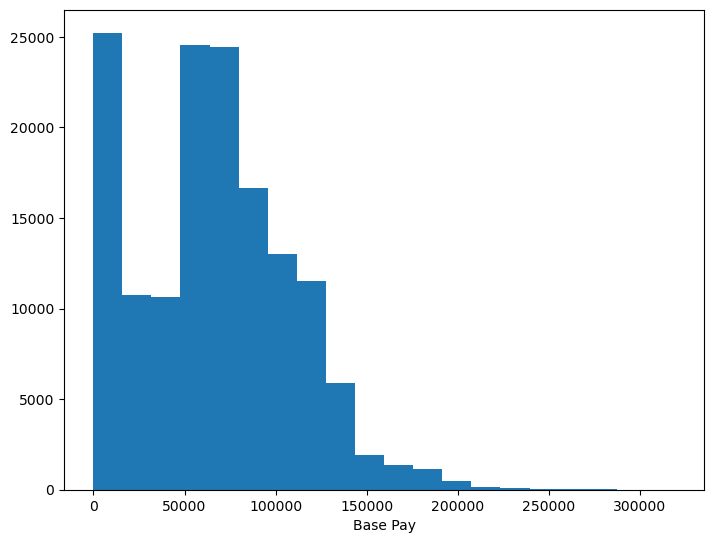

In [20]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.hist( dfs['BasePay'], bins=20 )

axe.set_xlabel('Base Pay')
fig.show()

### B. Diagrama de Caja

C:\Users\jorge\AppData\Local\Temp\ipykernel_35620\598491830.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


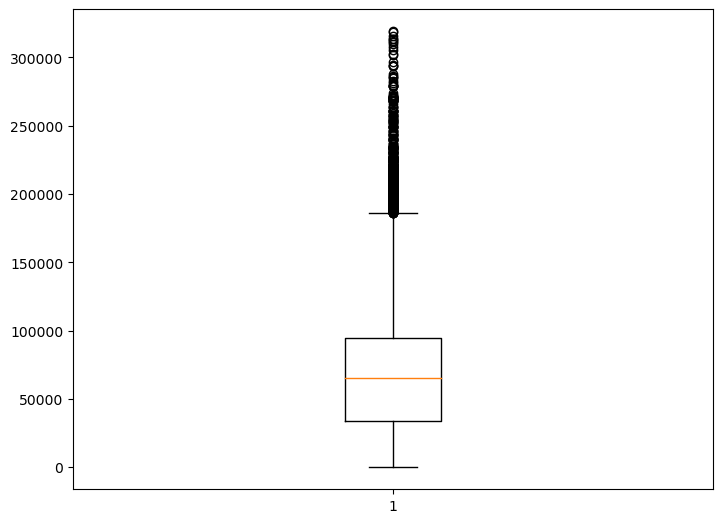

In [21]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.boxplot( dfs['BasePay'].dropna() )

fig.show()

### C. Diagrama de Dispersión

In [22]:
dfs[['BasePay']]

,BasePay
0,167411.18
1,155966.02
2,212739.13
3,77916.00
4,134401.60
...,...
148649,0.00
148650,NaN
148651,NaN
148652,NaN


Text(0, 0.5, 'Benefits')

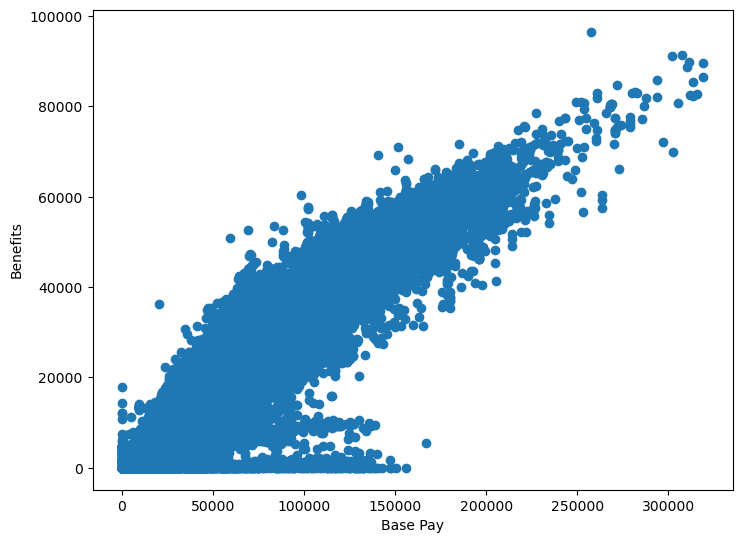

In [23]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.scatter( dfs['BasePay'], dfs['Benefits'] )

axe.set_xlabel('Base Pay')
axe.set_ylabel('Benefits')

### D. Diagrama de Barras

In [24]:
df3 = df[df['Fecha']==df['Fecha'].max()].groupby('Grupo de edad').sum()\
                                        .reset_index()
df3.head()

,Grupo de edad,Contagios
0,00 - 04 años,12718
1,05 - 09 años,11463
2,10 - 14 años,13652
3,15 - 19 años,22617
4,20 - 24 años,48247


Text(0, 0.5, 'Cant Contagios')

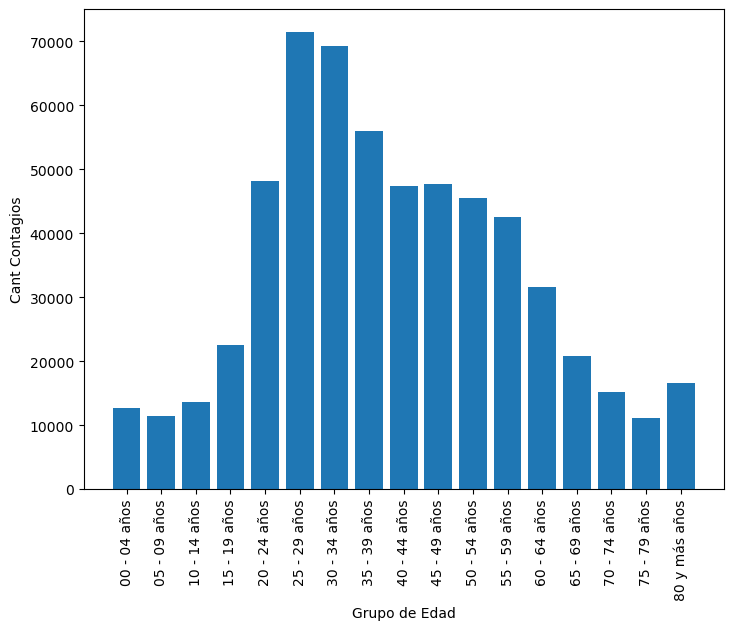

In [25]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.bar( df3['Grupo de edad'], df3['Contagios'] )

axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

### E. Diagrama de Torta

C:\Users\jorge\AppData\Local\Temp\ipykernel_35620\1180735098.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


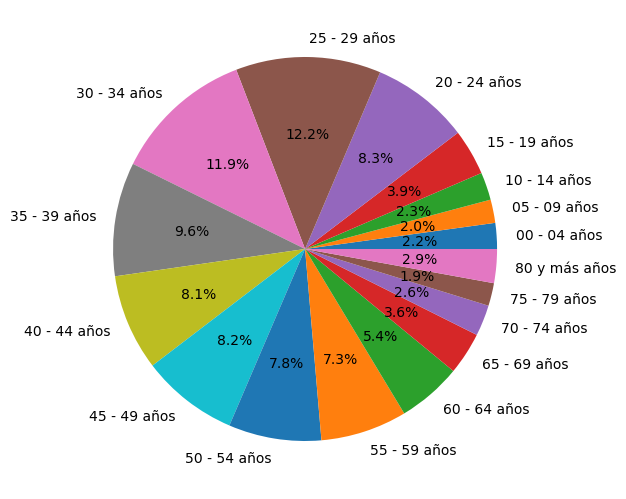

In [26]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.pie(df3['Contagios'], labels=df3['Grupo de edad'], autopct='%1.1f%%' )

fig.show()

### Combinación de diagramas

Text(0, 0.5, 'Cant Contagios')

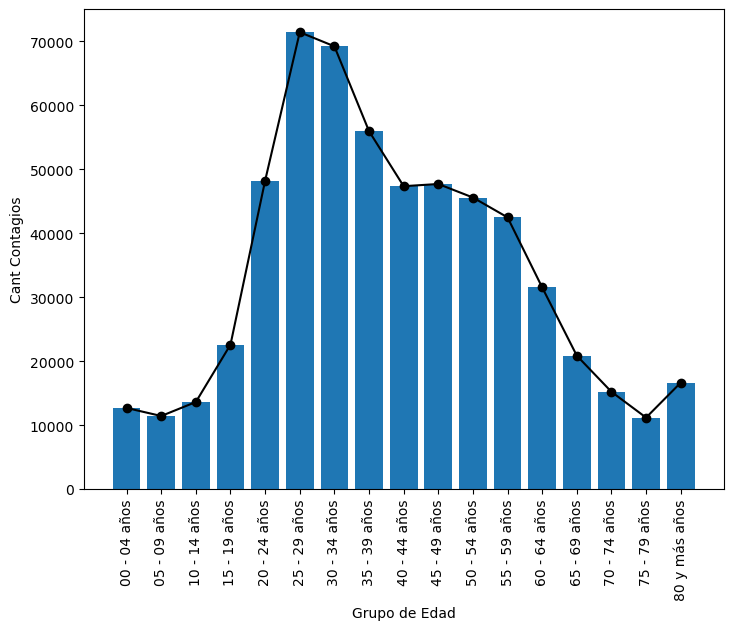

In [27]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])

axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )

axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

### Estilos

In [28]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [29]:
plt.style.use('bmh')

Text(0, 0.5, 'Cant Contagios')

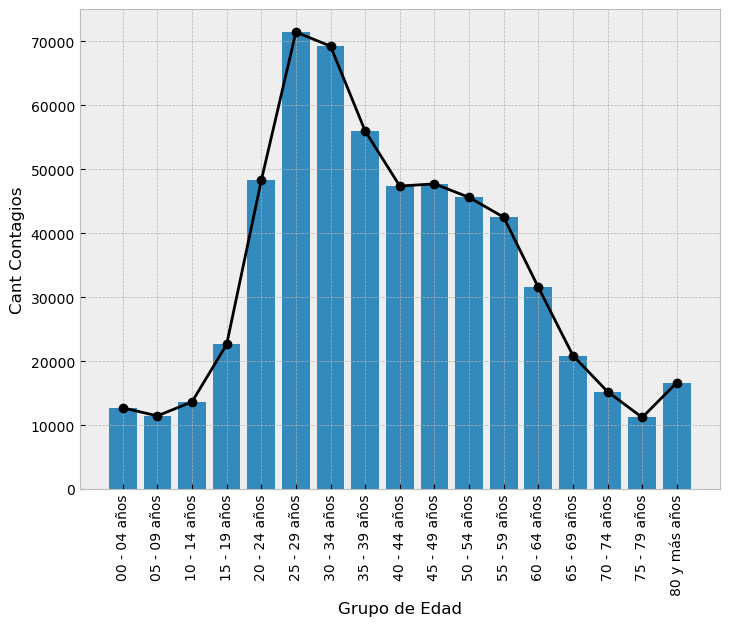

In [30]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

In [31]:
plt.style.use('ggplot')

Text(0, 0.5, 'Cant Contagios')

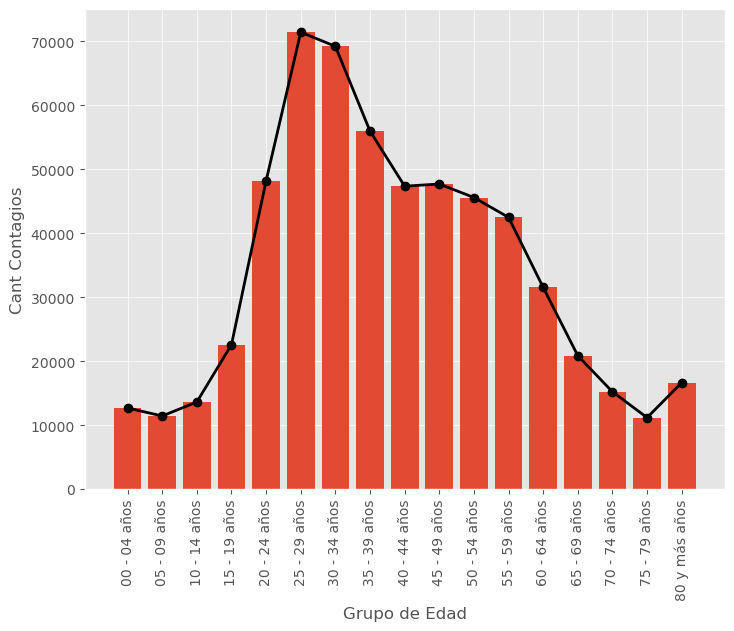

In [32]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')

In [33]:
plt.style.use('fivethirtyeight')

Text(0, 0.5, 'Cant Contagios')

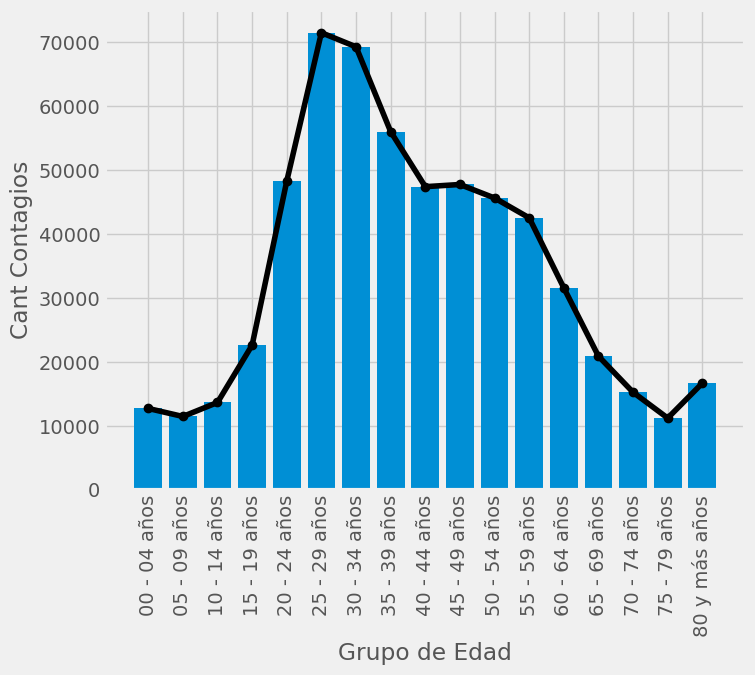

In [34]:
fig = plt.figure()
axe = fig.add_axes([0,0,1,1])
axe.plot( df3['Grupo de edad'], df3['Contagios'], c='k', marker='o' )
axe.bar( df3['Grupo de edad'], df3['Contagios'] )
axe.tick_params(axis='x', labelrotation=90)
axe.set_xlabel('Grupo de Edad')
axe.set_ylabel('Cant Contagios')